                                Analysis on Crimes on womens in india

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1.Extract the data and store it in the variable `df`

In [5]:
df=pd.read_csv(r"C:\Users\melim\OneDrive\Desktop\eda projects\archive (7)\CrimesOnWomenData.csv")
df

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...,...
731,731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,733,Delhi UT,2021,2,1,0,5,1,9,0
734,734,Lakshadweep,2021,0,0,0,1,1,3,0


2.Determine the shape of the data set

In [72]:
rows,columns=df.shape
print(f"number of rows of the data :{rows}\nnumber of columns of the data :{columns}")

number of rows of the data :736
number of columns of the data :9


3. Display the first 10 records of the data set 

In [75]:
df.head(10)

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
5,GOA,2001,12,6,2,17,7,11,0
6,GUJARAT,2001,286,857,67,756,111,3667,0
7,HARYANA,2001,398,297,285,478,401,1513,0
8,HIMACHAL PRADESH,2001,124,105,10,310,14,317,0
9,JAMMU & KASHMIR,2001,169,504,13,622,288,50,0


4. display the overview of the data

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  736 non-null    int64 
 1   State       736 non-null    object
 2   Year        736 non-null    int64 
 3   Rape        736 non-null    int64 
 4   K&A         736 non-null    int64 
 5   DD          736 non-null    int64 
 6   AoW         736 non-null    int64 
 7   AoM         736 non-null    int64 
 8   DV          736 non-null    int64 
 9   WT          736 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 57.6+ KB


 5.Determine the data types of each column in the dataset. 

In [78]:
df.dtypes

State    object
Year      int64
Rape      int64
K&A       int64
DD        int64
AoW       int64
AoM       int64
DV        int64
WT        int64
dtype: object

6.Check the given data set contains any null values

In [16]:
df.isnull().sum()

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64

7.Check the given data set contains any duplicate values or not 

In [18]:
df.duplicated().sum()

0

8.Drop the columns if unnecessary 

In [20]:
df.drop('Unnamed: 0', axis=1,inplace=True)


In [22]:
df.columns


Index(['State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT'], dtype='object')

In [24]:
df

,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,ASSAM,2001,817,1070,59,850,4,1248,0
3,BIHAR,2001,888,518,859,562,21,1558,83
4,CHHATTISGARH,2001,959,171,70,1763,161,840,0
...,...,...,...,...,...,...,...,...,...
731,D&N Haveli,2021,1250,4083,141,2068,417,4731,4
732,Daman & Diu,2021,315,904,16,1851,10,501,1
733,Delhi UT,2021,2,1,0,5,1,9,0
734,Lakshadweep,2021,0,0,0,1,1,3,0


9. Find the top states with high rape cases and visualize them

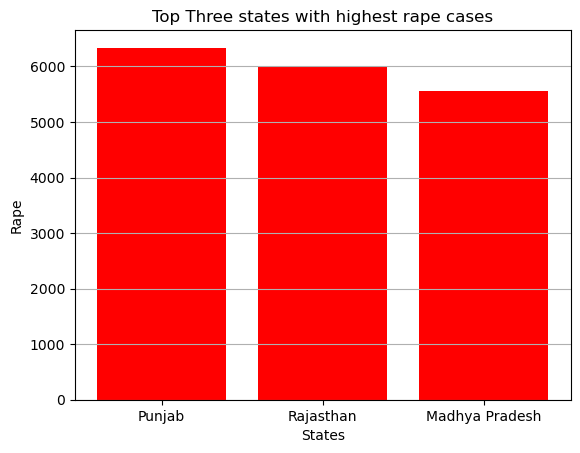

In [26]:
top_states=df.nlargest(3,"Rape")
plt.bar(top_states['State'],top_states['Rape'],color='r')
plt.xlabel('States')
plt.ylabel('Rape')
plt.title('Top Three states with highest rape cases')
plt.grid(axis='y')
plt.show()

10.Find the top states with smallest rape cases and visualize them

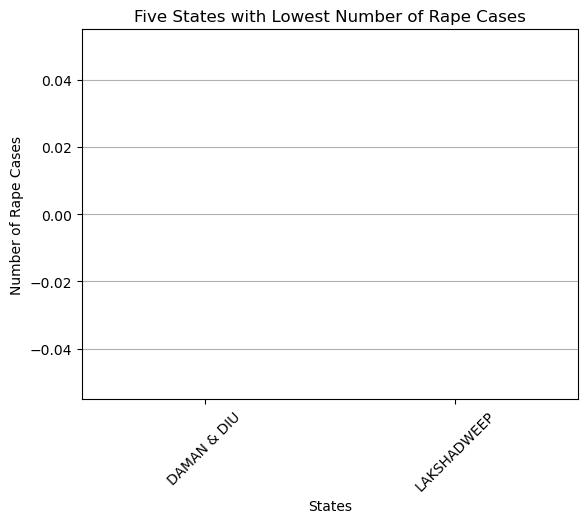

In [30]:
least_states = df.nsmallest(5, "Rape")
plt.bar(least_states['State'], least_states['Rape'])
plt.xlabel('States')
plt.ylabel('Number of Rape Cases')
plt.title('Five States with Lowest Number of Rape Cases')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()


11.  Find out which year got more kidnapped and assault and visualize them

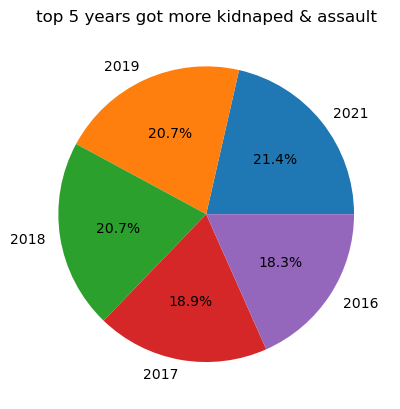

In [32]:
YKA=df.groupby('Year')['K&A'].sum().reset_index()
MAX=YKA.nlargest(5,"K&A")
plt.pie(MAX['K&A'],labels=MAX["Year"],autopct='%1.1f%%')
plt.title("top 5 years got more kidnaped & assault")
plt.show()

12.Finding which state got more K&A and Visualize 

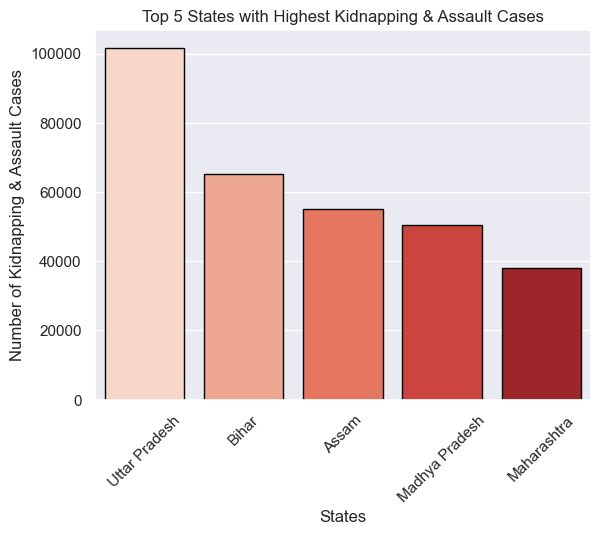

In [87]:
SKA = df.groupby('State')['K&A'].sum()
top_SKA = SKA.nlargest(5, keep='all').reset_index()
sns.barplot(x='State', y='K&A', data=top_SKA, palette='Reds', edgecolor='black')
plt.xlabel('States')
plt.ylabel('Number of Kidnapping & Assault Cases')
plt.title('Top 5 States with Highest Kidnapping & Assault Cases')
plt.xticks(rotation=45)
plt.show()

13.Finding which state got more dowry deaths and Visualize them

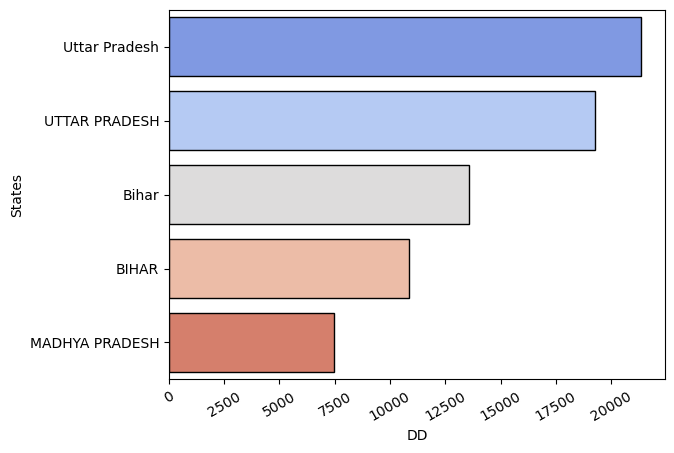

In [38]:
dd = df.groupby('State')['DD'].sum().reset_index()
top_states = dd.nlargest(5, 'DD')
sns.barplot(y='State', x='DD', data=top_states, palette='coolwarm', edgecolor='black')
plt.xlabel('DD')
plt.ylabel('States')
plt.xticks(rotation=30)
plt.show()

14. which state got less dowry deaths and visualize them

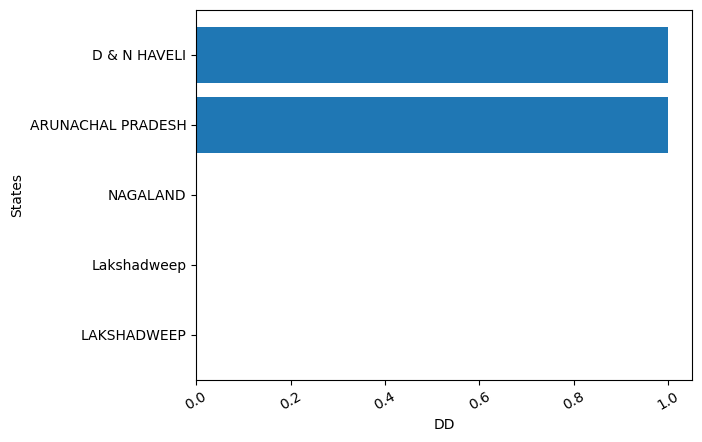

In [40]:
dd = df.groupby('State')['DD'].sum().reset_index()
top_states = dd.nsmallest(5, 'DD')
plt.barh(top_states['State'],top_states['DD'])
plt.xlabel('DD')
plt.ylabel('States')
plt.xticks(rotation=30)
plt.show()


15.Visualize dotted graph for which year got more DD 

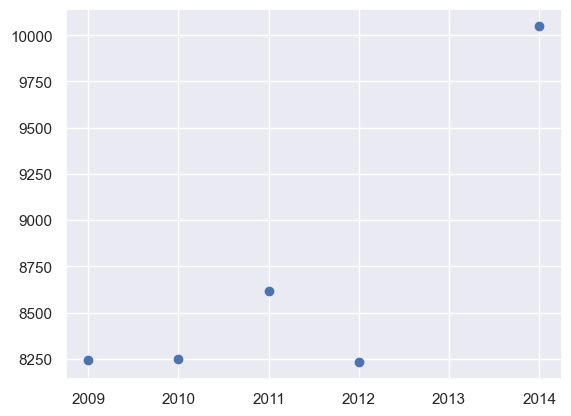

In [90]:
 ddy=df.groupby('Year')['DD'].sum()
top_ddy=ddy.nlargest(5,keep='all').reset_index()
plt.plot(top_ddy['Year'],top_ddy['DD'],'o')
plt.show()

16. Visualization for the rape cases per year

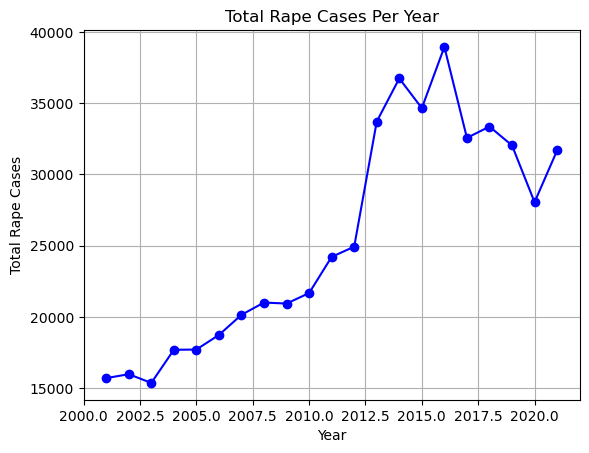

In [46]:
count_rape = df.groupby('Year')['Rape'].sum()
count_rape.plot(kind='line', marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Total Rape Cases')
plt.title('Total Rape Cases Per Year')
plt.grid(True)
plt.show()

17.Finding the correlation between two columns

         Rape      K&A
Rape  1.00000  0.70073
K&A   0.70073  1.00000


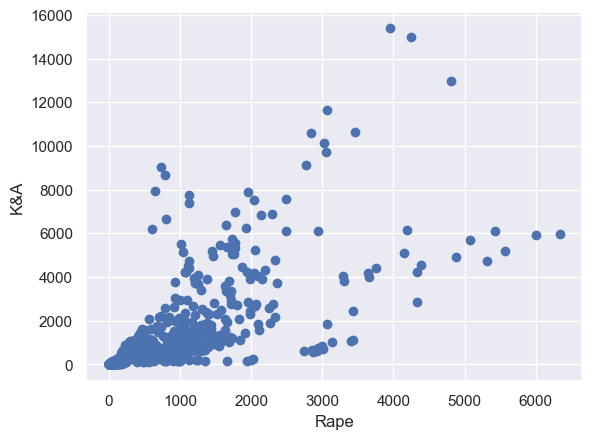

In [94]:
df1=df[['Rape','K&A']]
cor=df1.corr()
print(cor)
plt.scatter(x='Rape',y='K&A',data=df1)
plt.xlabel("Rape")
plt.ylabel("K&A")
plt.grid(True)
plt.show()

18. Finding the top five states of assault against womens and visualize them

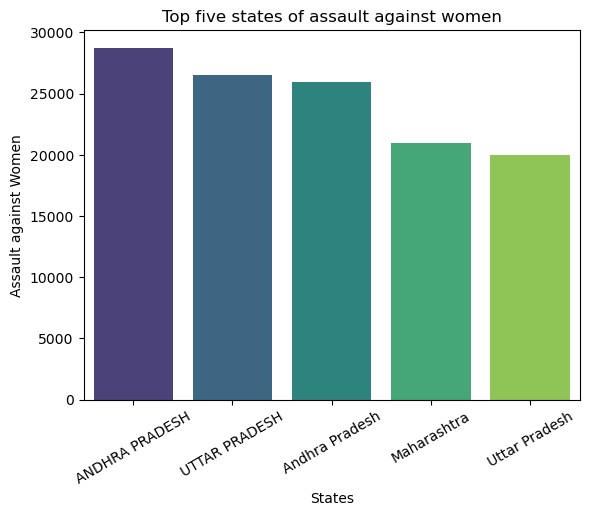

In [52]:
AOM=df.groupby('State')['AoM'].sum()
top_AOM=AOM.nlargest(5,keep='all').reset_index()
sns.barplot(x='State',y='AoM',data=top_AOM, palette='viridis')
plt.xlabel('States')
plt.ylabel('Assault against Women')
plt.title("Top five states of assault against women") 
plt.xticks(rotation=30)
plt.show()

19. Finding top five years of assault against women and Visualize them

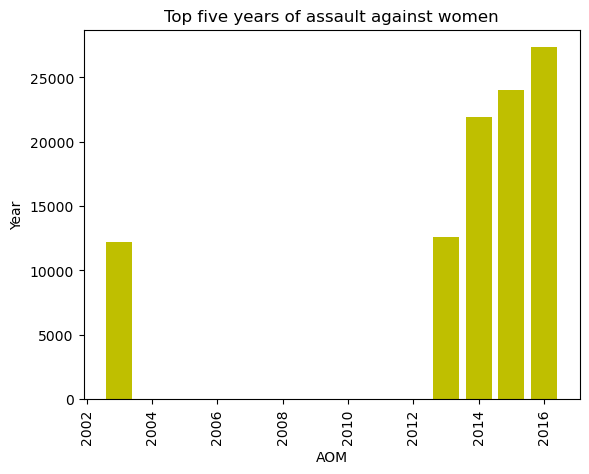

In [56]:
AOM=df.groupby('Year')['AoM'].sum()
top_AOM=AOM.nlargest(5,keep='all').reset_index()
plt.bar(top_AOM['Year'],top_AOM['AoM'],color='y')
plt.xlabel('AOM')
plt.ylabel('Year')
plt.title("Top five years of assault against women") 
plt.xticks(rotation=90)
plt.show()

20.finding the top five States with highest Average Rape cases and visualize them by using vertical bar graph

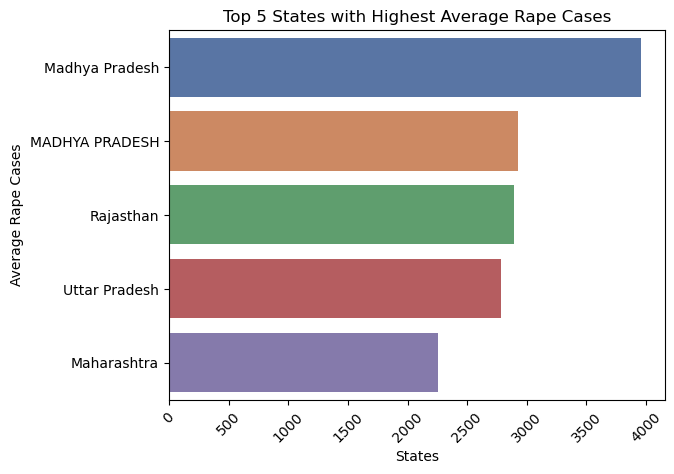

In [58]:
avg_rapes_per_state = df.groupby('State')['Rape'].mean().reset_index()
top_avg = avg_rapes_per_state.nlargest(5, 'Rape')
sns.barplot(y='State', x='Rape', data=top_avg, palette='deep')
plt.xlabel('States') 
plt.ylabel('Average Rape Cases')
plt.title('Top 5 States with Highest Average Rape Cases')
plt.xticks(rotation=45)
plt.show()


21.Find and Visualize the top five states with highest Women Trafficing by the states

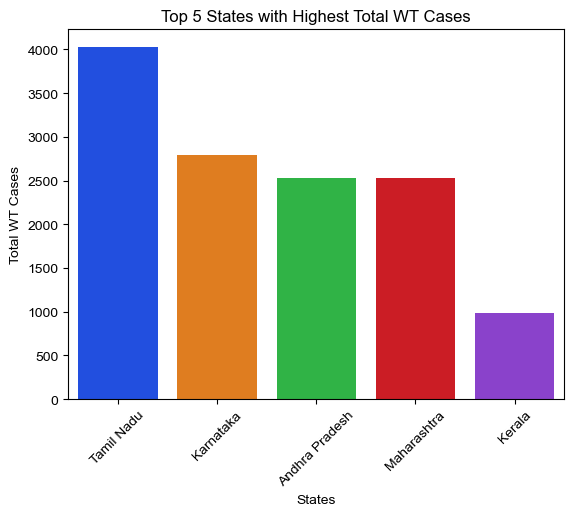

In [60]:
wt_by_state = df.groupby('State')['WT'].sum().reset_index()
large_WT = wt_by_state.nlargest(5, 'WT')
sns.barplot(x='State', y='WT', data=large_WT, palette='bright')
sns.set_theme()
plt.xlabel('States')
plt.ylabel('Total WT Cases')
plt.title('Top 5 States with Highest Total WT Cases')
plt.xticks(rotation=45)
plt.show()

22.Find and Visualize correlation of assault against women and assault against modesty of women 


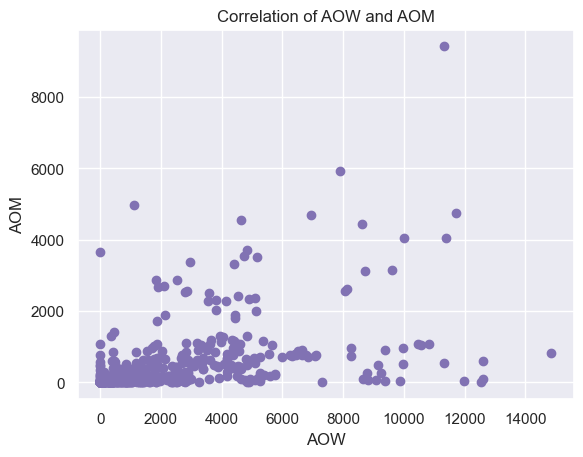

In [102]:
data= df[['AoW','AoM']]
plt.scatter(x='AoW',y='AoM',data=data,color='m')
plt.title('Correlation of AOW and AOM')
sns.set_theme()
plt.xlabel("AOW")
plt.ylabel("AOM")
plt.grid(True)
plt.show()

23. Visualize the correaltion of dd and dv by using heatmap 

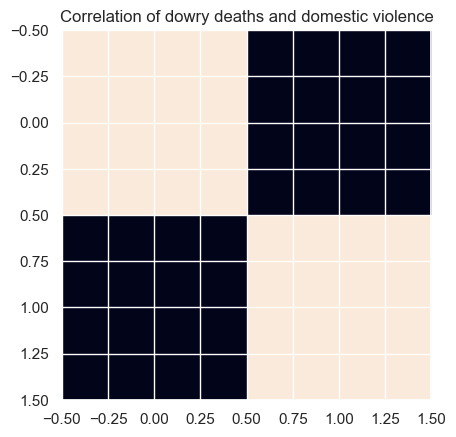

In [64]:
data = df[['DD','DV']]
cor=data.corr()
plt.imshow(cor)
plt.title("Correlation of dowry deaths and domestic violence")
plt.show()

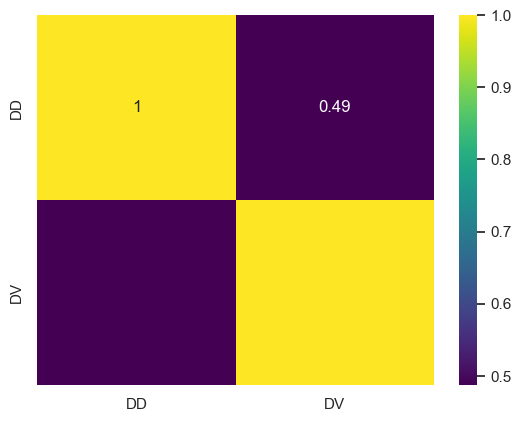

In [66]:
data =df[['DD','DV']]
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='viridis')
plt.grid(True)